In [86]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so
import pandas as pd
from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios

from sklearn.model_selection import train_test_split, KFold, cross_val_score

from formulaic import Formula

sube2023 = pd.read_csv("dataSets/dat-ab-usos-2023.csv")
#ordeno las columnas del df


print(sube2023.head())

  DIA_TRANSPORTE                                     NOMBRE_EMPRESA  \
0     2023-01-01  MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...   
1     2023-01-01  MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...   
2     2023-01-01                                 EMPRESA BATAN S.A.   
3     2023-01-01               COMPAÑIA  DE TRANSPORTE VECINAL S.A.   
4     2023-01-01           EMPRESA DE TRANSPORTE PERALTA RAMOS SACI   

              LINEA AMBA TIPO_TRANSPORTE JURISDICCION     PROVINCIA  \
0                 1   SI       COLECTIVO    MUNICIPAL  BUENOS AIRES   
1                2B   SI       COLECTIVO    MUNICIPAL  BUENOS AIRES   
2  BS_AS_LINEA 715M   NO       COLECTIVO    MUNICIPAL  BUENOS AIRES   
3   BS_AS_LINEA_326   SI       COLECTIVO   PROVINCIAL  BUENOS AIRES   
4   BS_AS_LINEA_512   NO       COLECTIVO    MUNICIPAL  BUENOS AIRES   

            MUNICIPIO  CANTIDAD DATO_PRELIMINAR  
0            MERCEDES        61              NO  
1            MERCEDES        11              N

In [87]:
sube2020 = pd.read_csv("dataSets/dat-ab-sube-2020.csv")
sube2021 = pd.read_csv("dataSets/dat-ab-sube-2021.csv")
sube2022 = pd.read_csv("dataSets/dat-ab-sube-2022.csv")
sube2024 = pd.read_csv("dataSets/dat-ab-usos-2024.csv")
subes

# Procesamiento de datos
**Ejercicio 1**

a) Visualizar el tipo de datos de cada columna. Transformar la columna DIA_TRANSPORTE
para que sea reconocida como una fecha.
Sugerencia: investigar la función to_datetime de pandas. Para completar el argumento
format, revisar la documentación de datetime

In [90]:
sube2023["DIA_TRANSPORTE"] = pd.to_datetime(sube2023["DIA_TRANSPORTE"], format = '%Y-%m-%d')

sube2023 = sube2023.rename(columns = {"DIA_TRANSPORTE" : "FECHA"})
#Verificamos que se convirtio en el tipo que queremos
sube2023.head()

,FECHA,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


 Agregar tres columnas al DataFrame:

-  FECHA_DIA : debe indicar el nombre del día de la semana correspondiente a
DIA_TRANSPORTE

-  FECHA_ORDINAL : debe indicar el ordinal correspondiente a DIA_TRANSPORTE (por
ejemplo, a 2023-01-01 le corresponde 1, a 2023-01-02 le corresponde 2 y así sucesiva-
mente). Debe ser un entero (int).

- . FECHA_MES : debe indicar el mes correspondiente a DIA_TRANSPORTE
Sugerencia: investigar el método apply de DataFrame.

In [91]:
#Tomamos solo el prefijo del dia
sube2023["FECHA_DIA"] = [fecha.day_name()[0:3] for fecha in sube2023["FECHA"]]
print(sube2023.head())


       FECHA                                     NOMBRE_EMPRESA  \
0 2023-01-01  MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...   
1 2023-01-01  MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...   
2 2023-01-01                                 EMPRESA BATAN S.A.   
3 2023-01-01               COMPAÑIA  DE TRANSPORTE VECINAL S.A.   
4 2023-01-01           EMPRESA DE TRANSPORTE PERALTA RAMOS SACI   

              LINEA AMBA TIPO_TRANSPORTE JURISDICCION     PROVINCIA  \
0                 1   SI       COLECTIVO    MUNICIPAL  BUENOS AIRES   
1                2B   SI       COLECTIVO    MUNICIPAL  BUENOS AIRES   
2  BS_AS_LINEA 715M   NO       COLECTIVO    MUNICIPAL  BUENOS AIRES   
3   BS_AS_LINEA_326   SI       COLECTIVO   PROVINCIAL  BUENOS AIRES   
4   BS_AS_LINEA_512   NO       COLECTIVO    MUNICIPAL  BUENOS AIRES   

            MUNICIPIO  CANTIDAD DATO_PRELIMINAR FECHA_DIA  
0            MERCEDES        61              NO       Sun  
1            MERCEDES        11              NO   

In [92]:
sube2023["FECHA_ORDINAL"] = [fecha.day for fecha in sube2023["FECHA"]]
sube2023.head()

,FECHA,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_ORDINAL
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun,1
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun,1
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun,1
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun,1
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun,1


In [93]:
sube2023["FECHA_MES"] = [fecha.month for fecha in sube2023["FECHA"]]
sube2023.head()

,FECHA,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_ORDINAL,FECHA_MES
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun,1,1
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun,1,1
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun,1,1
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun,1,1
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun,1,1


**Ejercicio 2**

Crear el DataFrame datos_amba, el cual sólo debe tener datos de AMBA y debe excluir datos
preliminares. Además, al ejecutar datos_amba.head() debe observarse el siguiente orden y
formato de columnas: 

In [94]:
#pequeño detalle, pero cambiamos el nombre "datos_amba" sugerido en el tp por "datos_amba2023" con el año
#incluido pues más adelante usaremos este mismo codigo para los df de 2020, 2021 y 2022.
subeAmba2023 = sube2023[(sube2023["AMBA"] == "SI") & (sube2023["DATO_PRELIMINAR"] == "NO")]
datos_amba2023 = subeAmba2023[["FECHA","FECHA_DIA","FECHA_MES","FECHA_ORDINAL","JURISDICCION","LINEA","CANTIDAD", "TIPO_TRANSPORTE"]]
#Renombro de acorde a lo pedido
datos_amba2023 = datos_amba2023.rename(columns = lambda s : "pasajeros" if s == "CANTIDAD"  else str.lower(s))  

datos_amba2023.head()


,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Sun,1,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Sun,1,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Sun,1,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Sun,1,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Sun,1,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


**Ejercicio 3.**

Utilizando datos_amba, identificar

- la proporcion de la cantidad total anual de pasajeros que le corresponda a cada medio de transporte

In [95]:
#La cantidad de pasajeros en cada medio de trasporte, divido el total de pasajeros, 
#multiplicado por 100 para tener porcentajes del 0% al 100%
PropXTransporte = (datos_amba2023.groupby("tipo_transporte")["pasajeros"].sum()/datos_amba2023["pasajeros"].sum() )*100
print(PropXTransporte)

tipo_transporte
COLECTIVO    83.764488
SUBTE         6.809700
TREN          9.425812
Name: pasajeros, dtype: float64


- La tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros

In [96]:
#Me creo un nuevo dataset usando el de datos_amba, que contenga unicamente los datos relevantes,
#agregando la cantidad de pasajeros por linea por mes
GenteXLineaXMesDF= datos_amba2023[datos_amba2023["tipo_transporte"] == "SUBTE"].groupby(["fecha_mes","linea"])["pasajeros"].sum().reset_index()

#idxmax me da el indice del maximo en la fila cantidad
filaMax = GenteXLineaXMesDF.loc[GenteXLineaXMesDF["pasajeros"].idxmax()]
MesLinea = (filaMax["fecha_mes"] , filaMax["linea"])
print(MesLinea)
 

(8, 'LINEA_B')


- El día hábil con menor desvío estándar en cantidad de pasajeros




In [97]:
#Filtro por dias Hables
amba_dias_habiles = datos_amba2023[(datos_amba2023["fecha_dia"] != ("Sat")) & (datos_amba2023["fecha_dia"] != ("Sun"))]
#Tomo dataframe solo con las columnas que me interesan, agregando la cantidad de pasajeros por dia
pasajeros_x_dia = amba_dias_habiles.groupby(["fecha_dia","fecha"])["pasajeros"].sum().reset_index()
#A cada uno de los dias les tomo la desviacion estandar, y devuelvo el indice del minimo
pasajeros_x_dia.groupby("fecha_dia")["pasajeros"].std().idxmin()

'Wed'

# 4. Analisis Exploratorio

**Funciones auxiliares**

In [ ]:
sube2020 = sube2020.rename(columns = {"DIA_TRANSPORTE" : "FECHA"})
sube2020["FECHA"] = pd.to_datetime(sube2020["FECHA"], format = '%Y-%m-%d')
sube2020["FECHA_DIA"] = [fecha.day_name()[0:3] for fecha in sube2020["FECHA"]]
sube2020["FECHA_ORDINAL"] = [fecha.day for fecha in sube2020["FECHA"]]
sube2020["FECHA_MES"] = [fecha.month for fecha in sube2020["FECHA"]]

sube2021 = sube2021.rename(columns = {"DIA_TRANSPORTE" : "FECHA"})
sube2021["FECHA"] = pd.to_datetime(sube2021["FECHA"], format = '%Y-%m-%d')
sube2021["FECHA_DIA"] = [fecha.day_name()[0:3] for fecha in sube2021["FECHA"]]
sube2021["FECHA_ORDINAL"] = [fecha.day for fecha in sube2021["FECHA"]]
sube2021["FECHA_MES"] = [fecha.month for fecha in sube2021["FECHA"]]

sube2022 = sube2022.rename(columns = {"DIA_TRANSPORTE" : "FECHA"})
sube2022["FECHA"] = pd.to_datetime(sube2022["FECHA"], format = '%Y-%m-%d')
sube2022["FECHA_DIA"] = [fecha.day_name()[0:3] for fecha in sube2022["FECHA"]]
sube2022["FECHA_ORDINAL"] = [fecha.day for fecha in sube2022["FECHA"]]
sube2022["FECHA_MES"] = [fecha.month for fecha in sube2022["FECHA"]]

sube2024 = sube2024.rename(columns = {"DIA_TRANSPORTE" : "FECHA"})
sube2024["FECHA"] = pd.to_datetime(sube2024["FECHA"], format = '%Y-%m-%d')
sube2024["FECHA_DIA"] = [fecha.day_name()[0:3] for fecha in sube2024["FECHA"]]
sube2024["FECHA_ORDINAL"] = [fecha.day for fecha in sube2024["FECHA"]]
sube2024["FECHA_MES"] = [fecha.month for fecha in sube2024["FECHA"]]

In [ ]:
subeAmba2020 = sube2020[(sube2020["AMBA"] == "SI") & (sube2020["DATO_PRELIMINAR"] == "NO")]
datos_amba2020 = subeAmba2020[["FECHA","FECHA_DIA","FECHA_MES","FECHA_ORDINAL","JURISDICCION","LINEA","CANTIDAD", "TIPO_TRANSPORTE"]]
datos_amba2020 = datos_amba2020.rename(columns = lambda s : "pasajeros" if s == "CANTIDAD"  else str.lower(s))  

subeAmba2021 = sube2021[(sube2021["AMBA"] == "SI") & (sube2021["DATO_PRELIMINAR"] == "NO")]
datos_amba2021 = subeAmba2021[["FECHA","FECHA_DIA","FECHA_MES","FECHA_ORDINAL","JURISDICCION","LINEA","CANTIDAD", "TIPO_TRANSPORTE"]]
datos_amba2021 = datos_amba2021.rename(columns = lambda s : "pasajeros" if s == "CANTIDAD"  else str.lower(s)) 

subeAmba2022 = sube2022[(sube2022["AMBA"] == "SI") & (sube2022["DATO_PRELIMINAR"] == "NO")]
datos_amba2022 = subeAmba2022[["FECHA","FECHA_DIA","FECHA_MES","FECHA_ORDINAL","JURISDICCION","LINEA","CANTIDAD", "TIPO_TRANSPORTE"]]
datos_amba2022 = datos_amba2022.rename(columns = lambda s : "pasajeros" if s == "CANTIDAD"  else str.lower(s))

subeAmba2024 = sube2024[(sube2024["AMBA"] == "SI") & (sube2024["DATO_PRELIMINAR"] == "NO")]
datos_amba2024 = subeAmba2024[["FECHA","FECHA_DIA","FECHA_MES","FECHA_ORDINAL","JURISDICCION","LINEA","CANTIDAD", "TIPO_TRANSPORTE"]]
datos_amba2024 = datos_amba2024.rename(columns = lambda s : "pasajeros" if s == "CANTIDAD"  else str.lower(s)) 

In [98]:
#agregamos una nueva columna con mes y año, pues nos será de utilidad en el gráfico.
sube2020["MES_AÑO"] = sube2020["FECHA"].dt.strftime("%b-%y")
sube2021["MES_AÑO"] = sube2021["FECHA"].dt.strftime("%b-%y")
sube2022["MES_AÑO"] = sube2022["FECHA"].dt.strftime("%b-%y")
sube2023["MES_AÑO"] = sube2023["FECHA"].dt.strftime("%b-%y")

In [103]:
subesTodosLosAños = [sube2020,sube2021,sube2022,sube2023]
def filtrarYAgrupar(df,filtro,agrupamiento = lambda x:x) -> pd.DataFrame:
    res = agrupamiento(df[filtro(df)])
    return res

***PRIMERA HIPÓTESIS***

Afortunadamente, hoy en día podemos decir que la pandemia COVID-19 es algo del pasado "cercano", pero pasado en fin.

Si bien hace tiempo que las cosas retomaron su ritmo natural, lo que más costó reestablecerse fueron los bares, cines, teatros, clubs, conciertos... entre otros lugares recreativos que uno suele atender los fines de semana.

En un principio, nuestra primera idea para entrar un poco en calor y conocer más los datos, fue analizar el uso de transporte público centrandonos en los fines de semana a lo largo de 2020 hasta 2023 con la intención de poder observar como afectó la pandemia a los días mas "sociales" de la semana en cuanto a movimiento de gente y transporte.

Nuestra hipótesis es que la cantidad de pasajeros que viajan los días sábados y domingos a lo largo de estos 4 años va a aumentar de manera creciente. Observando su mayor pendiente en 2021 y como esta se va normalizando en 2022/2023, ya que fue allí cuando la vida social volvió a su plenitud.

Veamos con qué nos encontramos en el medio de este proceso...

Primero filtramos los df por los fines de semana. 

*¡Observación!*

De ahora en adelante vamos a descartar los meses ENERO y FEBRERO de 2020, ya que los consideramos un valor outlier para este análisis. 
La razón es que nos interesa visualizar el comportamiento del uso del transporte **a partir** de la pandemia.

In [387]:
#agrupamos los df por cantidad de pasajeros *POR MES*
f_findes = lambda x : (x["FECHA_DIA"] == "Sat") | (x["FECHA_DIA"] == "Sun")
g_cantXMes = lambda x :x.groupby(["FECHA_MES","MES_AÑO"])["CANTIDAD"].sum().reset_index()
findesXAño = [filtrarYAgrupar(df,f_findes,g_cantXMes) for df in subesTodosLosAños]
#Concatenamos todos los años
findes = pd.concat(findesXAño,axis = 0).reset_index(drop=True)
#Dividimos para tener los numeros del finde promedio
findes["CANTIDAD"] = findes["CANTIDAD"]/2
#Descartamos enero y febrero del 2020
findes = findes.drop([0, 1]).reset_index(drop=True)

In [374]:
#concatenamos los 4 dfs armados en uno solo para poder graficar.
findes.head()

,FECHA_MES,MES_AÑO,CANTIDAD
0,2,Feb-20,30286220.0
1,4,Apr-20,4525860.5
2,5,May-20,7400387.5
3,6,Jun-20,6305895.0
4,7,Jul-20,5535607.0


El momento de la verdad... ¡A graficar!

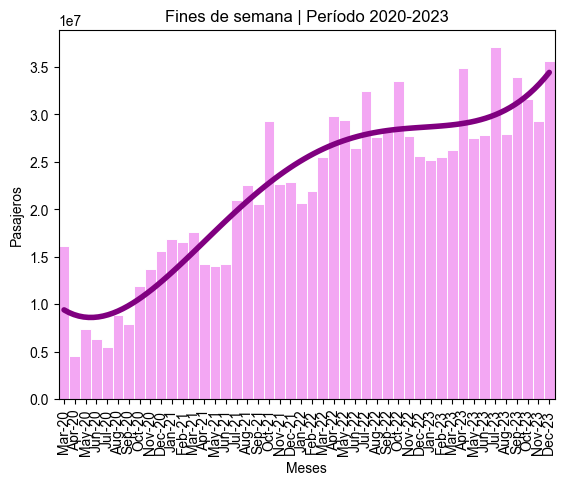

In [388]:
#Rotamos los indices del eje x
fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)

g = (
so.Plot(findes, "MES_AÑO", "CANTIDAD")
.add(so.Bars(color = "violet"))
.add(so.Line(color = "purple", linewidth = 4), so.PolyFit(4))
.label(title = "Fines de semana | Período 2020-2023", x="Meses", y="Pasajeros")
.layout(size=(20, 10))
.on(ax)
)
g.show()

Parece que el gráfico sigue la idea que teníamos! Que alegría!!! Que pedazos de científicos forma la UBA!!!!!!

Antes de sacar conclusiones apresuradas, pensemos si hay algun otro valor además de nuestra hipótesis que pueda estar afectando a este crecimiento constante...

Veamos el comportamiento pero sin distinción de días.

In [368]:
semana_completa = [df.groupby(["FECHA_MES", "MES_AÑO"])["CANTIDAD"].sum().reset_index() for df in subesTodosLosAños]
semana_completa = pd.concat(semana_completa, axis = 0).reset_index(drop=True)
semana_completa = semana_completa.drop([0, 1]).reset_index(drop=True)
#Tomamos la semana promedio
semana_completa["CANTIDAD"] = semana_completa["CANTIDAD"]/7
semana_completa.head()

,FECHA_MES,MES_AÑO,CANTIDAD
0,3,Mar-20,3.175639e+07
1,4,Apr-20,8.455406e+06
2,5,May-20,1.110768e+07
3,6,Jun-20,1.199901e+07
4,7,Jul-20,1.079345e+07


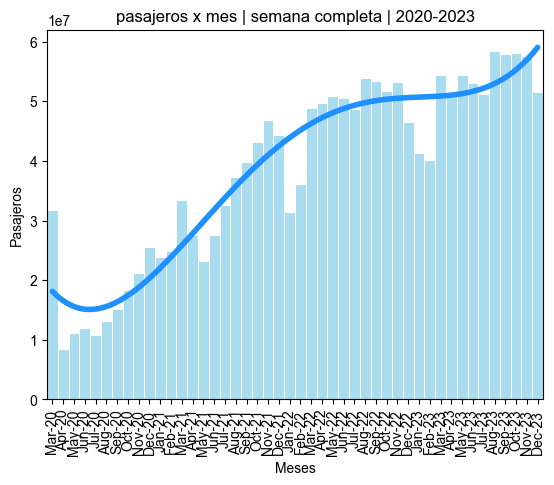

In [369]:
#Rotamos los nombres de los meses para ayudar la lectura
fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)
g = (
so.Plot(semana_completa, "MES_AÑO", "CANTIDAD")
.add(so.Bars(color = "skyblue"))
.add(so.Line(color = "dodgerblue", linewidth = 4), so.PolyFit(4))
.label(x="Meses", y="Pasajeros", title = "pasajeros x mes | semana completa | 2020-2023")
.scale(width=12, height=6)
.on(ax)
)
g.show()

Che pucha que raro... también se vé un aumento notablemente creciente del uso del transporte sin distinción de día. Acá hay gato encerrado, vamos a googlear un poco...

<img src="dataSets/sube.noticias.png">


*Fuente: argentina.gob.ar/ - noticias del año 2023*

-_-'

Al parecer a lo largo del tiempo en el que estuvimos analizando el aumento del uso del transporte, también fue aumentando la implementación de la tarjeta SUBE en distintos puntos del país, lo cual está afectando directamente a nuestro caso.

De hecho, si prestamos más atención a la cantidad de filas que tienen los 4 datasets originales por separado...

In [370]:
print(sube2020.shape[0], sube2021.shape[0], sube2022.shape[0], sube2023.shape[0])

356628 410644 439337 472291


La cantidad de datos registrados también fue aumentando **notablemente** a lo largo de los años.
 
Finalmente, ya no podemos adjudicar el aumento en forma creciente de nuestro primer gráfico *(unicamente)* a la lenta apertura y normalización de eventos sociales los días sábados, si no que también juega un rol importantisimo el aumento de implementacion de la tarjeta SUBE a lo largo del país, y también la diferencia de datos registrados en cada dataset.

Para arreglar este último inconveniente, vamos a sacar provecho de nuestra condición de porteños y centrarnos en el *AMBA*

In [309]:
print(subeAmba2020.shape[0], subeAmba2021.shape[0], subeAmba2022.shape[0], subeAmba2023.shape[0])

145156 146796 147240 149973


¡Ahora nos gusta más!

Recordemos que nuestra primera hipótesis sugiere que el uso de transporte en los fines de semana va a ir aumentando de manera creciente durante los años de pandemia, observando mayor pendiente durante 2021, y como ésta se va normalizando en 2022/2023 cuando los eventos sociales volvieron a su plenitud. 

Ahora, ¿Qué pasa cuando comparamos este comportamiento de fin de semana contra un día habil cualquiera? ¿Crecerán de manera similar?

Para esta segunda parte del análisis tomaremos el día *miercoles* (motivados por el inciso 3c, pues vimos que es el día con menor desvío estandar) como día habil de comparación y veremos el crecimiento del uso del transporte durante este día. 
Nuestra nueva hipótesis es que su crecimiento tendrá **mayor pendiente** a comparación del crecimiento de los fines de semana. 

La razón es que la gente se vió en la necesidad de salir a trabajar con mucha más urgencia y priorizó resguardarse los fines de semana.

Veamos que sucede...

Primero recuperamos los findes de semana que son solo de caba

In [314]:
f_Sat_amba = lambda x : (x["FECHA_DIA"] == "Sat") & (x["AMBA"] == "SI")
sabados_ambaXAño = [filtrarYAgrupar(df,f_Sat_amba,g_cantXMes) for df in subesTodosLosAños]
sabados_amba = pd.concat(sabados_ambaXAño,axis= 0).reset_index(drop = True)
sabados_amba = sabados_amba.drop([0, 1]).reset_index(drop=True)
sabados_amba.head()

,FECHA_MES,MES_AÑO,CANTIDAD
0,3,Mar-20,15079039
1,4,Apr-20,5097337
2,5,May-20,8664057
3,6,Jun-20,7097198
4,7,Jul-20,6159281


In [315]:
f_Sun_amba = lambda x : (x["FECHA_DIA"]== "Sun") & (x["AMBA"] == "SI")
domingo_ambaXAño = [filtrarYAgrupar(df,f_Sun_amba,g_cantXMes) for df in subesTodosLosAños]
domingo_amba = pd.concat(domingo_ambaXAño,axis= 0).reset_index(drop = True)
domingo_amba = domingo_amba.drop([0, 1]).reset_index(drop=True)
domingo_amba.head()

,FECHA_MES,MES_AÑO,CANTIDAD
0,3,Mar-20,12209604
1,4,Apr-20,2787338
2,5,May-20,4143579
3,6,Jun-20,3344398
4,7,Jul-20,3043223


In [383]:
domingo_amba["CANTIDAD"] = (domingo_amba["CANTIDAD"] + sabados_amba["CANTIDAD"])/2
finde_amba = domingo_amba
finde_amba.head()
#finde_amba = findes[findes["AMBA"] == "SI"]
findes

,FECHA_MES,MES_AÑO,CANTIDAD
0,3,Mar-20,16101189.5
1,4,Apr-20,4525860.5
2,5,May-20,7400387.5
3,6,Jun-20,6305895.0
4,7,Jul-20,5535607.0
5,8,Aug-20,8860844.0
6,9,Sep-20,7981124.5
7,10,Oct-20,11891079.0
8,11,Nov-20,13770615.0
9,12,Dec-20,15609123.5


MIERCOLES

In [319]:
f_miercolesHabiles = lambda x: (x["FECHA_DIA"] == "Wed") & (x["AMBA"] == "SI")
g_cantFecha = lambda x: x.groupby(["FECHA_MES", "MES_AÑO"])["CANTIDAD"].sum().reset_index()
miercolesXAño = [filtrarYAgrupar(df,f_miercolesHabiles,g_cantFecha) for df in subesTodosLosAños]
miercoles_amba = pd.concat(miercolesXAño, axis = 0).reset_index(drop=True)
miercoles_amba = miercoles_amba.drop([0, 1]).reset_index(drop=True)
miercoles_amba.head()

,FECHA_MES,MES_AÑO,CANTIDAD
0,3,Mar-20,29779355
1,4,Apr-20,10284222
2,5,May-20,11051819
3,6,Jun-20,11173804
4,7,Jul-20,11816118


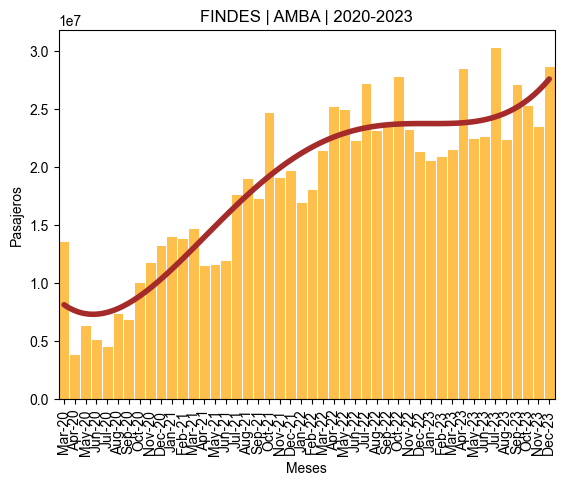

In [371]:
fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)
finde = (
so.Plot(finde_amba, "MES_AÑO", "CANTIDAD")
.add(so.Bars(color = "orange"))
.add(so.Line(color = "brown", linewidth = 4), so.PolyFit(4))
.label(title= "FINDES | AMBA | 2020-2023", x="Meses", y="Pasajeros")
.scale(width=12, height=6)
.on(ax)
)
finde.show()

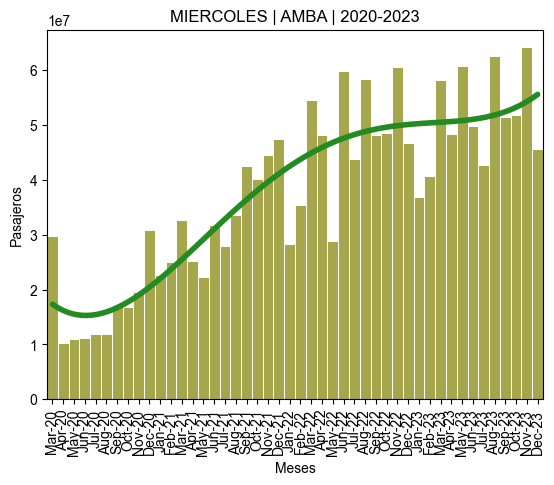

In [360]:
fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)
mier = (
so.Plot(miercoles_amba, "MES_AÑO", "CANTIDAD")
.add(so.Bars(color = "olive"))
.add(so.Line(color = "forestgreen", linewidth = 4), so.PolyFit(4))
.label(title= "MIERCOLES | AMBA | 2020-2023", x="Meses", y="Pasajeros")
.scale(width=12, height=6)
.on(ax)
)
mier.show()

Bueno... a priori los crecimientos de ambos gráficos parecen bastante similares. :-( 
Pero notemos que ambos gráficos utilizan escálas distintas, veamos que sucede cuando comparamos los datos del miercoles contra los datos de fin de semana en un mismo gráfico

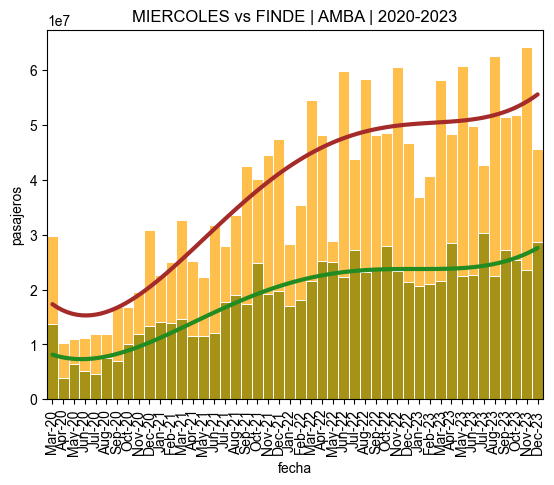

In [361]:
fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)
g = (
so.Plot()
.add(so.Bars(color = "orange"), data = miercoles_amba, x = "MES_AÑO", y = "CANTIDAD")
.add(so.Bars(color = "olive"), data = finde_amba, x = "MES_AÑO", y = "CANTIDAD")
.add(so.Line(color = "brown", linewidth = 3), so.PolyFit(4), data = miercoles_amba, x = "MES_AÑO", y = "CANTIDAD")
.add(so.Line(color = "forestgreen", linewidth = 3), so.PolyFit(4), data = finde_amba, x = "MES_AÑO", y = "CANTIDAD")
.label(title = "MIERCOLES vs FINDE | AMBA | 2020-2023", x = "fecha", y = "pasajeros")
.on(ax)

)
# Mostrar el gráfico
g.show()

Viendo el gráfico notamos 3 etapas interesantes con respecto al crecimiento.

$$  \color{lightcoral}{\text{Etapa 1 : Marzo 2020 - Diciembre 2020}} \ \ $$

En esta primera etapa notamos un crecimiento bastante similar entre Miercoles y Finde. 
Coincide con el inicio de la pandemia y cuarentena estricta; gran parte de estos meses el aislamiento fue *obligatorio* y solo unos pocos contaban con permisos para usar libremente el transporte público. Por lo tanto es lógico que no notemos mucha diferencia entre el crecimiento de ambos.

$$  \color{gold}{\text{Etapa 2 : Diciembre 2020 - Agosto 2022}} \ \ $$

En esta segunda etapa observamos que el crecimiento de Miercoles "despega" de manera pronunciada en comparación al crecimiento más gradual de Finde. Coincide con la flexibilización de las restricciones impuestas por el aislamiento. Despues de varios meses en cuarentena, la gente se ve en la necesidad de volver a retomar trabajos presenciales, lo que aumenta la cantidad de viajes en día habil. En cambio el gráfico pareceria indicar que el movimiento en los fines de semana aumenta de forma más gradual. Pareceria que la gente se vió en la necesidad de salir a trabajar pero todavía eligen resguardarse los fines de semana. 

$$  \color{palegreen}{\text{Etapa 3 : Agosto 2022 - Diciembre 2023}} \ \ $$

En esta tercera etapa ambos crecimientos vuelven a aumentar de forma similar. Esto coincide con el fin de la pandemia, la cuarentena y las restricciones de aislamiento. Se vuelve a la "nueva normalidad" y ambos crecimientos parecen normalizarse. 


Veamos estas 3 etapas gráficamente! 

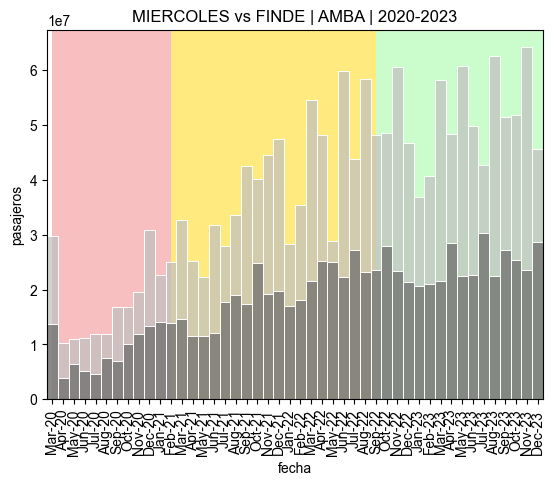

In [362]:
fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation=90)
g = (
so.Plot()
.add(so.Bars(color = "silver"), data = miercoles_amba, x = "MES_AÑO", y = "CANTIDAD")
.add(so.Bars(color = "dimgrey"), data = finde_amba, x = "MES_AÑO", y = "CANTIDAD")
.label(title = "MIERCOLES vs FINDE | AMBA | 2020-2023", x = "fecha", y = "pasajeros",)
.on(ax)

)

#divido las tres etapas por colores
ax.axvspan(0, 11, facecolor='lightcoral', alpha=0.5, zorder=0)
ax.axvspan(11, 30, facecolor='gold', alpha=0.5, zorder=0)
ax.axvspan(30, 47, facecolor='palegreen', alpha=0.5, zorder=0)

g.show()

# 5. Modelado

Primero hacemos un poco de preprocesamiento con los datos que trabajaremos

In [ ]:
sube_regresion = pd.read_csv("dataSets/sube-2023-regresion.csv")

Tomamos los datos de todas las lineas del amba, que tengan jurisdiccion nacional

In [ ]:
datos_ColectivoJN = sube_regresion[(sube_regresion["TIPO_TRANSPORTE"] == "COLECTIVO") & (sube_regresion["JURISDICCION"] == "NACIONAL") &(sube_regresion["AMBA"] == "SI") ]
cols = datos_ColectivoJN.LINEA.unique() # Los nombres de las lineas de colectivo
pasajeros_por_linea = pd.DataFrame()
for col in cols:
    datos_linea = datos_ColectivoJN [datos_ColectivoJN.LINEA == col][["DIA_TRANSPORTE","CANTIDAD"]]
    datos_linea = datos_linea.set_index ("DIA_TRANSPORTE").rename(columns ={"CANTIDAD" : col })
    pasajeros_por_linea = pd.concat ([ pasajeros_por_linea ,datos_linea ], axis = 1)
pasajeros_por_linea = pasajeros_por_linea.reset_index()

#Tiramos las columnas con datos faltantes
pasajeros_por_linea =pasajeros_por_linea.dropna(axis=1)
display(pasajeros_por_linea.head())


,DIA_TRANSPORTE,BS_ASLINEA_123,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,...,LINEA 4,LINEA 42,LINEA 44,LINEA 50,LINEA 6,LINEA 7,LINEA 76,LINEA 8,LINEA_099,LINEA_164_AMBA
0,2023-01-01,1681,5670,5644,5177,9109,7013,1604,2617,11235,...,2942,4029,4649,4839,2449,2184,3797,5317,1882,3210
1,2023-01-02,9440,21759,23284,21176,45269,29962,13921,11934,55611,...,15329,19072,20387,16221,10486,12774,17374,23250,10322,19362
2,2023-01-04,10540,24755,25405,23806,52873,33659,16172,13366,61721,...,17836,21609,23595,18448,12193,13949,19860,26294,11981,21784
3,2023-01-05,10408,25772,26489,24688,53436,35182,16569,12929,62510,...,18044,21993,23687,18481,12888,14668,21235,27216,11787,22972
4,2023-01-06,10530,26021,26458,24167,53163,35212,16459,12955,63528,...,18122,22421,23731,19300,12703,14199,23472,27073,11567,23411


Para hacer mas simple la visualizacion , y contemplando que solo vamos a trabajar con un año, vamos a cambiar las "fechas" por su dias

In [ ]:
pasajeros_por_linea["DIA_TRANSPORTE"] = pd.to_datetime(pasajeros_por_linea["DIA_TRANSPORTE"],format = "%Y-%m-%d").dt.dayofyear

Como primera idea, vamos a tomar algunos colectivos cuyos recorridos sean *similares* a la Linea 9. Despues de investigar un poco , creamos este mapa donde podemos visualizar los recorridos de nuestras 4 elecciones, junto con la Linea 9:

<img src="dataSets/recorridosLineas.jpeg"   width="1000" height="500">

Los colores representan :

$$\color{lightblue}{\text{Linea 45}} \ \

\color{purple}{\text{Linea 93}} \ \ 
 
\color{blue}{\text{Linea 37}} \ \

\color{green}{\text{Linea 28}} \ \

\color{pink}{\text{Linea 9}}$$

Antes de formular los modelos , necesitamos recuperar los nombres de cada linea en el dataSet. 


In [ ]:
def buscaNomLinea(df,numLinea) -> str:
    nombreLinea = ""
    for nombre in pd.Series(df.columns):
        if numLinea in nombre:
            nombreLinea = nombre
            break
    return nombreLinea

aBuscar = ["45","93","37"," 28"]
nomLineas = [buscaNomLinea(pasajeros_por_linea,name) for name in aBuscar]
#Checkeamos que sean las que buscamos
print(nomLineas)


['BSAS_LINEA_045', 'BSAS_LINEA_093', 'BSAS_LINEA_037', 'LINEA 28']


Le cambamos el nombre a la linea 28 para tener consistencia

In [ ]:
pasajeros_por_linea = pasajeros_por_linea.rename(columns = {"LINEA 28" : "BSAS_LINEA_28"} )

Dado que todas las lineas tienen recorridos similares, no es evidente que hubiese ninguna interaccion entre ellas. Asi que vamos a plantear un modelo simple:
- Linea 9 ~  *(Linea_45 + Linea_93 + Linea_37 + Linea_28)*
 
Probemos el ajuste del modelo y veamos el r2

El r2 es de 0.9325555344310024, la Raiz del ECM es : 2614.644888474183


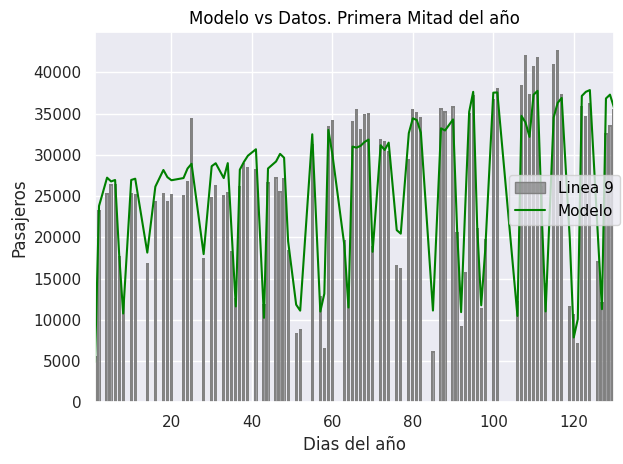

In [ ]:
formula_1="BSAS_LINEA_009 ~ BSAS_LINEA_045 + BSAS_LINEA_093 + BSAS_LINEA_037 + BSAS_LINEA_28"
modelo = linear_model.LinearRegression()
y,X = Formula(formula_1).get_model_matrix(pasajeros_por_linea)
modelo.fit(X,y)
y_pred = modelo.predict(X)

grafico = (
 so.Plot(data=pasajeros_por_linea, x = "DIA_TRANSPORTE", y ="BSAS_LINEA_009")
 .add(so.Bar(color = "gray"),label = "Linea 9") 
 .add(so.Line(color = "green"),y = y_pred.flatten(), label = "Modelo")
 .label(title ="Modelo vs Datos. Primera Mitad del año",x = "Dias del año", y = "Pasajeros")
 .limit(x= (1,130))
)

 

print( "El r2 es de {0}, la Raiz del ECM es : {1}".format(r2_score(y,y_pred),np.sqrt(mean_squared_error(y,y_pred))))
grafico.show()

Nada mal! A primera vista, con este testeo sencillo obtuvimos un R2 bastante decente. Sin embargo nos gustaría tener un criterio de selección mas robusto para nuestras lineas. Ver "a ojo" cuales tienen recorridos similares puede no ser suficiente, ademas de limitarnos en las relaciones que las lineas pueden tener entre ellas. Vamos a definir que quiere decir que lineas de colectivo sean "similares" en comportamiento a la linea 9

Nuestro criterio entonces, será el siguiente:

- Vamos a buscar la linea cuya diferencia maxima de la cantidad de pasajeros contra la linea 9 entre todos los dias sea la minima posible .
Formalmente:

\begin{align*}
&\text{Sea } \textbf{L} = \{L_1, L_2, ..., L_n\} \text{ el conjunto de todas las líneas distintas de transporte (salvo la linea 9) y } \textbf{Dias} = \{d_1, d_2, ..., d_n\} \ \text{el conjunto de dias en el dataset} \\
&\text{Para cada línea } L_i \text{ en } \textbf{L}, \text{ sea } P_{L_i}(d) \text{ la cantidad de pasajeros en la línea } L_i \text{ en el día } d. \ \text{Sea } P_9(d) \text{ la cantidad de pasajeros en la línea 9 en el día } d. \\
&\text{Definimos la función } f : \mathbb{N} \rightarrow \mathbb{N} \text{ como:} \\
\\
&f(L_i) = \max_{d \in \textbf{Dias}} \left| P_{L_i}(d) - P_9(d) \right| \\
\\
&\text{La linea óptima } L_{opt} \text{ es aquella que minimiza la función } f(L), \\
\end{align*}


Busquemos nuestra $L_{opt}$ junto con las 4 siguientes mejores $L's$:

In [ ]:
def difMaximaLinea9(L) -> int:
    #Definicion de funcion f(L)
    difMax = abs(pasajeros_por_linea[L]-pasajeros_por_linea["BSAS_LINEA_009"]).max()
    return difMax

def encontrarMejoresNLineas(n):
    #Genero diferencias de c/u con la linea 9
    diferencias = {linea : difMaximaLinea9(linea) for linea in pasajeros_por_linea.columns if linea != "BSAS_LINEA_009"}
    #Ordeno por las diferencias de manera creciente, y corto por las n primeras
    mejoresLineas = sorted(diferencias.items(),key = lambda x : x[1])[:n]
    return mejoresLineas

L_optimas = encontrarMejoresNLineas(5)
print(L_optimas)

[('BSAS_LINEA_091', 11175), ('BSAS_LINEA_135', 11529), ('BSAS_LINEA_146', 11530), ('LINEA_164_AMBA', 11633), ('BSAS_LINEA_188', 11988)]


Ya tenemos nuestras Lineas predictoras! Observemos que ninguna de ellas son las mismas que elegimos antes. Planteemos ahora el mismo modelo sencillo y veamos si hay diferencia:

Linea 9 ~ *Linea 91 + Linea 135 + Linea 146 + Linea 164 + Linea 188*


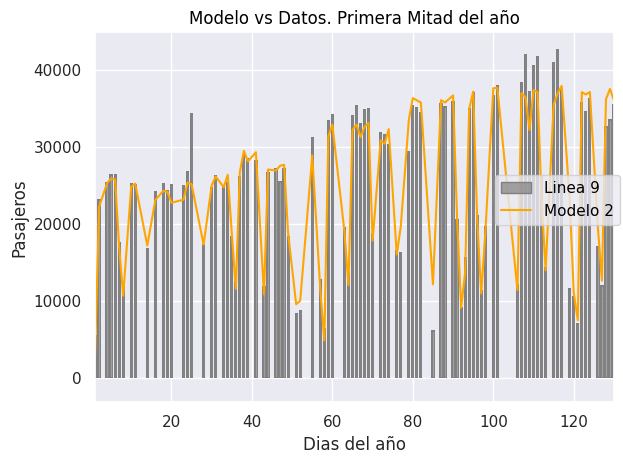

El r2 es de 0.959267099071292, la raiz del ECM es : 2031.946291823388


In [ ]:
formula_2="BSAS_LINEA_009 ~ BSAS_LINEA_091 + BSAS_LINEA_135 + BSAS_LINEA_146 + LINEA_164_AMBA + BSAS_LINEA_188"
modelo = linear_model.LinearRegression()
y,X = Formula(formula_2).get_model_matrix(pasajeros_por_linea)
modelo.fit(X,y)
y_pred = modelo.predict(X)

grafico = (
 so.Plot(data=pasajeros_por_linea, x = "DIA_TRANSPORTE", y ="BSAS_LINEA_009")
 .add(so.Bar(color = "gray"),label = "Linea 9") 
 .add(so.Line(color = "orange"),y = y_pred.flatten(), label = "Modelo 2")
 .label(title ="Modelo vs Datos. Primera Mitad del año",x = "Dias del año", y = "Pasajeros")
 .limit(x= (1,130))
)

grafico.show()
print( "El r2 es de {0}, la raiz del ECM es : {1}".format(r2_score(y,y_pred),np.sqrt(mean_squared_error(y,y_pred))))

Eureka! Inmediatamente en el testeo simple nuestro R2 subio casi 0,03 puntos. 

Como 3er modelo, planteemos alguna relacion con estos mismos colectivos. No seria poco razonable pensar, que ya  que las lineas de colectivo son parte de un sistema de transporte unficado, que estas mismas dinamica deberia verse reflejada en el modelo.
Si queremos representar todas las posibles relaciones entre ellos, nuestro modelo *(en notacion wilkinson)*  queda de la siguiente manera:

- Linea 9 ~  *(Linea_45 + Linea_93 + Linea_37 + Linea_28)* * *(Linea_45 + Linea_93 + Linea_37 + Linea_28)*

Este modelo es naturalmente bastante mas complejo que el anterior, y esto podria llegar a ser problematico. No obstante veamos que obtenemos como resultado

El r2 es de 0.9623790742493384, la raiz del ECM es : 1952.7843826969777


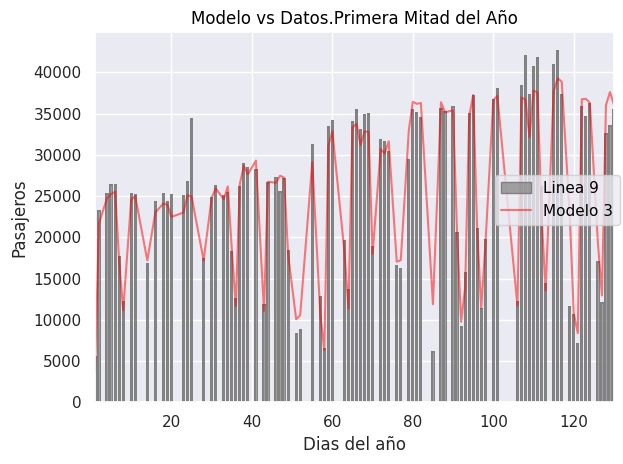

In [ ]:
formula_3="BSAS_LINEA_009 ~ (BSAS_LINEA_091 + BSAS_LINEA_135 + BSAS_LINEA_146 + LINEA_164_AMBA + BSAS_LINEA_188)*(BSAS_LINEA_091 + BSAS_LINEA_135 + BSAS_LINEA_146 + LINEA_164_AMBA + BSAS_LINEA_188)"
modelo = linear_model.LinearRegression()
y,X = Formula(formula_3).get_model_matrix(pasajeros_por_linea)
modelo.fit(X,y)
y_pred = modelo.predict(X)

grafico = (
 so.Plot(data=pasajeros_por_linea, x = "DIA_TRANSPORTE", y ="BSAS_LINEA_009")
 .add(so.Bar(color = "gray"),label = "Linea 9") 
 .add(so.Line(color = "red",alpha = 0.5 ),y = y_pred.flatten(),label = "Modelo 3")
 .label(title ="Modelo vs Datos.Primera Mitad del Año",x = "Dias del año", y = "Pasajeros")
 .limit(x=(1,130))
)

print( "El r2 es de {0}, la raiz del ECM es : {1}".format(r2_score(y,y_pred),np.sqrt(mean_squared_error(y,y_pred))))
grafico.show()

Obtuvimos otra mejora! Esto era de esperarse, ya que la complejidad del modelo subio bastante. ¿Sera cierto que este es mejor que los demas? ¿Habra Overfitting en algun modelo? 

Vamos a utlizar la tecnica de validacion cruzada entre los 3 modelos para elegir nuestro ganador. Primero separamos los datos en Training y Testing, luego realizammos el training sobre nuestro k-folds , tomando siempre la raiz del error cuadratico medio(RMSE) en cada uno. Luego tomamos el promedio de esto ultimos y repetimos. Aquella formula que consiga tener el menor RMSE medio sera la ganadora.
Con esta entrenaremos sobre el total del conjunto de entrenamiento, calcularemos el error en contra de los datos de testing finales

In [ ]:
formulas = [formula_1,formula_2,formula_3]
X = [0]*len(formulas)
Modelos = [linear_model.LinearRegression(fit_intercept= False)]*3
#Separo en train y testing
df_train,df_test = train_test_split(pasajeros_por_linea,test_size=0.2, random_state= 2355)
MejorModelo = {"rmseMean" : 1e8 , "formula" : ""}
cant_folds = 6

#Aca voy a guardar la media de todos los RMSE en cada K-Fold , para cada modelo respectivamente 
rmseMean = np.zeros(len(formulas))
for i in range(0,len(formulas)):
  y,X[i] = Formula(formulas[i]).get_model_matrix(df_train)
  #Obtenemos los indices de los cortes
  cv = KFold(n_splits = cant_folds ,random_state = 1523, shuffle = True)
  #A partir de esto obtengo un lazy iterator
  rmse = np.zeros(cant_folds)
  ind = 0
  #Entrenamos sobre todos los folds
  for train_index, val_index in cv.split(X[i]):
    x_train,x_val,y_train,y_val = X[i].iloc[train_index],X[i].iloc[val_index], y.iloc[train_index],y.iloc[val_index]

    Modelos[i].fit(x_train,y_train)
    y_pred = Modelos[i].predict(x_val)
    rmse[ind] = np.sqrt(mean_squared_error(y_val,y_pred))
    ind = ind + 1
  
  rmseMean[i] = rmse.mean()
 
  
  if rmseMean[i] < MejorModelo["rmseMean"]:
    MejorModelo["rmseMean"] = rmseMean[i] 
    MejorModelo["formula"] = formulas[i] 

  

#Entrenamos sobre todo el conjunto de entrenamiento (validacion + entrenamiento)
i_Best = formulas.index(MejorModelo["formula"])
f_Best = MejorModelo["formula"]

Modelos[i_Best].fit(X[i_Best],y)

#Ahora comparamos con la parte que no usamos originalmente
y_test, x_test = Formula(f_Best).get_model_matrix(df_test)

y_pred = Modelos[i_Best].predict(x_test)
RECM =  np.sqrt(mean_squared_error(y_test,y_pred))
R2 = r2_score(y_test,y_pred)
print("Modelo ganador,{0}  \n Resultados sobre testeo:  R2 : {1} , RECM :{2}  ".format(f_Best, R2,RECM))

Modelo ganador,BSAS_LINEA_009 ~ BSAS_LINEA_091 + BSAS_LINEA_135 + BSAS_LINEA_146 + LINEA_164_AMBA + BSAS_LINEA_188  
 Resultados sobre testeo:  R2 : 0.9760388602711159 , RECM :1654.9008091866494  


Tenemos un ganador! Parece que e el 3er modelo teniamos bastante overfitting, ya que un modelo bastante mas simple pudo obtener mejores resultados en el testeo. No obstante , nuestra metodo de seleccion de colectivos un poco mas *analitico* parece haber sido mas eficaz que nuestro primer intento

Nuestra formula ganadora fue : **Linea 9 ~ Linea 91 + Linea 135 + Linea 146 + Linea 164 + Linea 188**

